In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
columns_to_timestamp = ['Ukončeno FLYER', 'Datum přidělení', 'Domluvená montáž', 'Datum zápisu','Aktivován', 'Vráceno Callcentru', 'Zrušeno', ]

def make_timestamp(df):
    for i in columns_to_timestamp:
        df[i] =  pd.to_datetime(df[i], dayfirst=True)
    

## Loading_df with basic descriptive Statistic

Pozitivně ukončeno 16031 0.6040316503391108
Negativně ukončeno 10509 0.39596834966088923


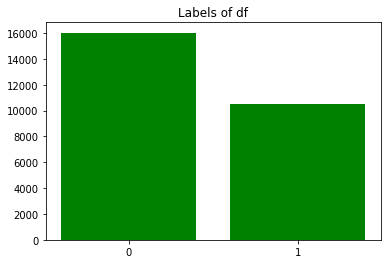

(26540, 11)
     věk  Merchant_Rating  Merchant_Overall  Merchant_Probability  city_n  \
0   57.0              495              1311                   0.7    5832   
1   38.0              495              1311                   0.7    1054   
2   38.0              495              1311                   0.7      41   
3   42.0              495              1311                   0.7     523   
4   57.0              495              1311                   0.7    1913   
5   54.0              495              1311                   0.7    2891   
6   57.0              495              1311                   0.7    2884   
7   57.0              495              1311                   0.7    4512   
8   57.0              495              1311                   0.7    5169   
9   57.0              495              1311                   0.7    1477   
10  57.0              495              1311                   0.7    2855   
11  57.0              495              1311                   0.

In [2]:
df = pd.read_csv(r"C:\Users\fandl\OneDrive\Plocha\intersat_final_ML3.csv")

Flayer = df['Stav_n'].value_counts().values[0]
Zrušeno = df['Stav_n'].value_counts().values[1]

def Kum (x,y):
    gg = x/(x+y)
    return gg
    
print('Pozitivně ukončeno',Flayer, Kum(Flayer,Zrušeno))
print('Negativně ukončeno',Zrušeno, Kum(Zrušeno,Flayer))

x = df['Stav_n'].value_counts().index
states = df['Stav_n'].value_counts().values
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, states, color='green')
plt.title("Labels of df")
plt.xticks(x_pos, x)
plt.show()
print(df.shape)
print(df.head(20))

In [3]:
df_KM = df.drop(['Stav_n'],axis=1) 

In [4]:
df_KM.head()

,věk,Merchant_Rating,Merchant_Overall,Merchant_Probability,city_n,Kód kampaně_n,gender_n,Titul_n,Dokumenty_n,Merchant_Is_Relevant_n
0,57.0,495,1311,0.7,5832,3,1,30,1,1
1,38.0,495,1311,0.7,1054,4,0,30,1,1
2,38.0,495,1311,0.7,41,3,0,30,1,1
3,42.0,495,1311,0.7,523,3,0,30,1,1
4,57.0,495,1311,0.7,1913,33,0,30,1,1


In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df_KM.values
X = scaler.fit_transform(X)

# optimalni pocet clusteru
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

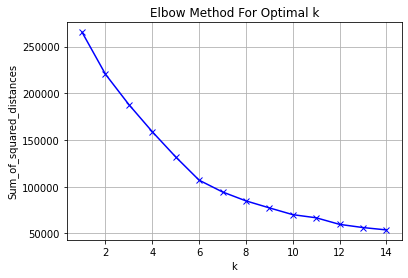

In [6]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.grid()

In [9]:
km = KMeans(n_clusters=7)
y_km = km.fit_predict(X)

In [16]:
np.unique(y_km, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1108, 5517, 2053, 4561, 1519,  134, 2209, 3134, 1042, 5263],
       dtype=int64))

In [10]:
df['cluster'] = y_km
df.head()

,věk,Merchant_Rating,Merchant_Overall,Merchant_Probability,city_n,Kód kampaně_n,gender_n,Titul_n,Dokumenty_n,Stav_n,Merchant_Is_Relevant_n,cluster
0,57.0,495,1311,0.7,5832,3,1,30,1,0,1,1
1,38.0,495,1311,0.7,1054,4,0,30,1,0,1,1
2,38.0,495,1311,0.7,41,3,0,30,1,0,1,1
3,42.0,495,1311,0.7,523,3,0,30,1,0,1,1
4,57.0,495,1311,0.7,1913,33,0,30,1,0,1,3


# Slicing_df
### 75% train to 25% test

In [11]:
T = df.shape[0]
split = int(T*0.75)
train_df = df.iloc[:split]
test_df = df.iloc[split:]

## Preparing DF to fit in models


In [12]:
X_train = train_df.loc[:, train_df.columns != 'Stav_n']
y_train = train_df['Stav_n']#.values.reshape(-1,1)
X_test = test_df.loc[:, test_df.columns != 'Stav_n']
y_test = test_df['Stav_n']#.values.reshape(-1,1)

## LogisticRegression - Classification problem


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

logreg = LogisticRegression()
logreg_1 = logreg.fit(X_train, y_train)

C:\Users\fandl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
logreg_1.score(X_train, y_train)

0.6822406430545089

In [28]:
pred_prob = logreg.predict_proba(X_test)
pred_prob_log = logreg.predict_log_proba(X_test)
y_hat = logreg.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_hat).sum()))

A = X_test.shape[0]
B = (y_test != y_hat).sum()
succes_rate = 100-B/A*100
print(succes_rate)

Number of mislabeled points out of a total 6635 points : 1913
71.16804822908817


In [39]:
y_hat[1]

1

In [30]:
pred_prob[30]

array([0.21735901, 0.78264099])

In [14]:
con_mat = confusion_matrix(y_test, y_hat)
con_mat

array([[3913,  239],
       [1668,  815]], dtype=int64)

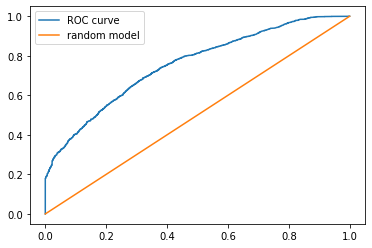

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:, 1], )

plt.plot(fpr, tpr, label='ROC curve')
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), label='random model')
plt.legend()
plt.show()

In [94]:
roc_auc_score(y_test, pred_prob[:, 1])

0.7542200256542175

## GaussianNB

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score


gnb = GaussianNB()
Model_G = gnb.fit(X_train, y_train)
y_pred_G = Model_G.predict(X_test)
y_pred_proba_G = Model_G.predict_proba(X_test)


print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_pred_G).sum()))

A = X_test.shape[0]
B = (y_test != y_pred_G).sum()
succes_rate = 100-B/A*100
print(succes_rate)

Number of mislabeled points out of a total 6635 points : 2143
67.70158251695554


In [97]:
Model_G.score(X_train, y_train)

0.6461693041949259

In [99]:
con_mat = confusion_matrix(y_test, y_pred_G)
con_mat

array([[3647,  505],
       [1497,  986]], dtype=int64)

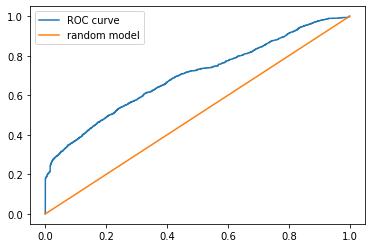

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_G[:, 1], )

plt.plot(fpr, tpr, label='ROC curve')
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), label='random model')
plt.legend()
plt.show()

In [101]:
roc_auc_score(y_test, y_pred_proba_G[:, 1])

0.6962247910065905

## Decision tree

In [22]:
from sklearn import tree
model_T = tree.DecisionTreeClassifier()
model_T = model_T.fit(X_train, y_train)
y_predict_tree = model_T.predict(X_test)
predict_proba_tree = model_T.predict_proba(X_test)

print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_predict_tree).sum()))

A = X_test.shape[0]
B = (y_test != y_predict_tree).sum()
succes_rate = 100-B/A*100
print(succes_rate)

Number of mislabeled points out of a total 6635 points : 2061
68.93745290128109


In [21]:
confusion_matrix(y_test, y_predict_tree)

array([[3248,  904],
       [1144, 1339]], dtype=int64)

In [23]:
y_predict_tree[0]

1

In [25]:
predict_proba_tree[2]

array([0., 1.])

In [70]:
model_T.score(X_train, y_train)

0.9806581260989701

## Time_line_models

In [17]:
#loading DF
df_all = pd.read_csv('intersat_final_df.csv')
make_timestamp(df_all)
# df_all.columns
df_all.shape

C:\Users\fandl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(27106, 61)

C:\Users\fandl\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


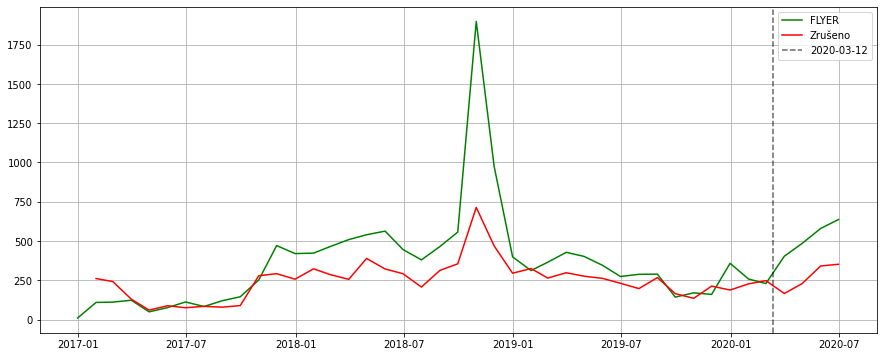

In [18]:
dfA = df_all
#FLYER
Overview_of_sales = dfA.loc[(dfA['Stav'] == 'Ukončeno FLYER' )]
#key is difrent column that previus "ukon4eno FLYER"
Overview_of_sales = Overview_of_sales.groupby(pd.Grouper(key='Ukončeno FLYER', freq="m")).count()
#slicing misstakes of merchants
Overview_of_sales = Overview_of_sales['Stav'][35:-1]
Emergency_date = pd.to_datetime('2020-03-12')

#making DF for linear regresion 
df_OS = Overview_of_sales.to_frame()

# df_OS['months_from_start'] = (df_OS.index - df_OS.index[0]).days/30; df_OS 
# df_OS = df_OS.round(0)

fig, ax = plt.subplots(figsize=(15, 6))
# figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

Overview_of_cancled = dfA.loc[(dfA['Stav'] == 'Zrušen' )].groupby(pd.Grouper(key='Zrušeno', freq="M")).count()
Overview_of_cancled = Overview_of_cancled['Stav'][:-1]
df_CO = Overview_of_cancled.to_frame()
plt.plot(Overview_of_sales, c='g', label='FLYER',)
plt.plot(Overview_of_cancled, c='r',label='Zrušeno')
ax.axvline(Emergency_date, color='k', label=Emergency_date.date(), ls='dashed', alpha=0.6)
plt.grid()
plt.legend()
df_all_merge = pd.merge(df_OS, df_CO, left_index=True, right_index=True)
df_all_merge = df_all_merge.rename(columns={"Stav_x": "FLAYER Absolute","Stav_y": "Zrušeno Absolute"})

In [19]:
df_OS = df_OS.reset_index()
df_OS = df_OS.rename(columns={"Stav": "y","Ukončeno FLYER": "ds"})
df_OS

,ds,y
0,2016-12-31,10
1,2017-01-31,109
2,2017-02-28,111
3,2017-03-31,123
4,2017-04-30,49
5,2017-05-31,76
6,2017-06-30,112
7,2017-07-31,83
8,2017-08-31,120
9,2017-09-30,145


In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

mod = SARIMAX(df_OS['y'], 
              seorder=(1,1,1),
              trend='c'
             )
fit_mod = mod.fit()


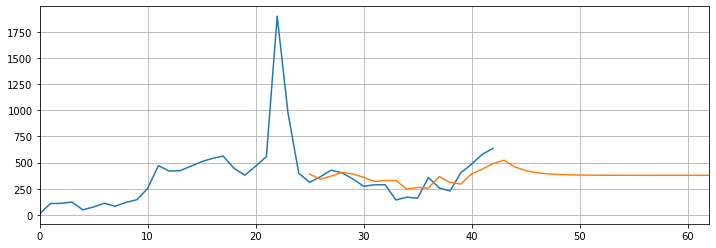

In [24]:
preds = fit_mod.predict(start=df_OS.index[15],
                    end=df_OS.index[-1]+20,
                    )
preds = preds[10:]
fig, ax = plt.subplots(figsize=(12,4))
df_OS['y'].plot(ax=ax)
# test_df['y'].plot(ax=ax)
preds.plot(ax=ax, grid=True)
# plt.axvline(split_date, c='k', linestyle='dashed')
plt.show()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


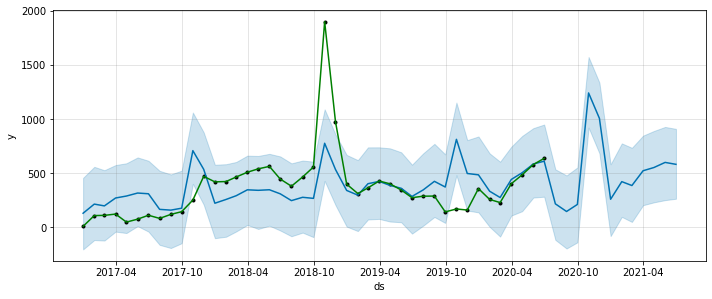

In [58]:
from fbprophet import Prophet
m = Prophet(seasonality_mode='multiplicative')
m.fit(df_OS)
future = m.make_future_dataframe( periods=12, freq='M')
forecast = m.predict(future)
fig = m.plot(forecast)
fig.set_size_inches(10,4)
plt.plot(Overview_of_sales, c='g', label='FLYER',)
